In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer

from sklearn.feature_extraction import text # to create custom stop words
from sklearn.preprocessing import FunctionTransformer # makes functions into a inputable parameter in a pipeline! 

import warnings
warnings.filterwarnings("ignore")
# helper functions for nlp eda counts
from helper_functions.nlp_helper_functions import punctuation_cntr, Lcase_counter, Ucase_counter


In [356]:
df_main = pd.read_csv('../data/cleaned_main.csv')
df_main.head()

,selftext,title,target
0,There are a lot of chauvinists in the U S who ...,Is Kamala Harris more at risk of assassination...,0
1,Let me explain The name of your movement shoul...,A push labeled Let mothers hold their babies,0
2,I have read about some horrific pit bull attac...,Why don t we see politicians supporting pit bu...,0
3,Some international observers have argued that ...,What threat does EU expansion pose towards Russia,0
4,Every definition of the term implies cheating ...,Why is gerrymandering legal,0


---
The following Logistic Regression model will be fitted on just the selftext from the dataset, first the vectorizer parameteres will be explored, afterwards the Logistic Regression hyper parameters will be explored and optimized.

<br>

A Note for the Logistic Regression Model Iterations:

Since the priority is creating a model that could differentiate between conspiracy and policial discourse the majority of the model evaluation will be focused on accuracy. However a confusion matrix and misclassficiations will noted as we progress through iterations to have a general sense of misclassification rates.


In [358]:
# creating X and y for model 
X = df_main['selftext']
y = df_main['target']

In [359]:
# baseline accuracy (what we want to perform better)
y.value_counts(normalize=True)

0    0.503281
1    0.496719
Name: target, dtype: float64

Because of the careful cleaning we have a evenly split dataset that we want to perform better than just having a 50% chance of guessing whether a post is from the Conspiracy subreddit versus AskPolitics subreddit.

In [351]:
# splitting data assuming this dataset represents generally all posts on each subreddit
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

best score 0.7791245791245792
best params {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.3}
train score 0.9858585858585859
test score 0.8125


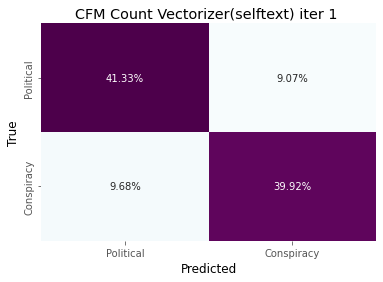

In [353]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('model', LogisticRegression(max_iter=10_000))    
])
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.1, 0.2, 0.3, 0.4] # chose 1 the first time and then can maybe try higher magnitude values
}
gs1 = GridSearchCV(pipe, hyper_params,cv=3)
gs1.fit(X_train,y_train)
print('best score',gs1.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs1.best_params_)
print('train score',gs1.score(X_train,y_train))
print('test score',gs1.score(X_test,y_test))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_test, gs1.predict(X_test))
cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext) iter 1 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

From the first iteration we can denote that there is a preference for certain parameters and the logistic regression model as fairly capable of differentiating between subreddit is based on the accuracy score and low percentages of misclassifications. 

Hyper Parameter Discussion 
<br><br>
Count Vector: 
* Stop Words  - determining if the default colloquail words provided by sklearn help filter for predictive power 
* Ngram range - determing if single words or short phrases (three words phrases) will perform better 
* binary      - determining if 'True' then does the frequency of the word/term is useful (returns 1 count) otherwise if 'False' returns (0)

Logistic Regression: 
* C (1/alpha) - determining which penalty term would be most useful to regulate the more common words in each subreddit

best score 0.7791245791245792
best params {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.3}
train score 0.9858585858585859
test score 0.8125


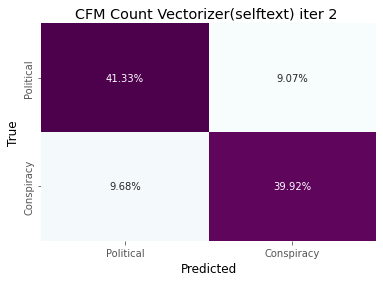

In [354]:
# 
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.1, 0.2, 0.3, 0.4] # chose 1 the first time and then can maybe try higher magnitude values
}
gs2 = GridSearchCV(pipe, hyper_params,cv=3)
gs2.fit(X_train,y_train)
print('best score',gs2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs2.best_params_)
print('train score',gs2.score(X_train,y_train))
print('test score',gs2.score(X_test,y_test))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_test, gs2.predict(X_test))
cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext) iter 2 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

The parameters following parameters have held constants for the past two iterations: 
<br><br>


Count Vector Parameters:
* binary       = True 
* n_gram range = (1,1)
* stop_words   = 'english'


Log Reg Parameters:
* **C = 0.3** 

***Noted: will alter *C* to [0.3, 0.4,0.5,0.6]) since the higher range was favored***



best score:  0.7811447811447811
best params:  {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.5}
train score 0.98989898989899
test score 0.8104838709677419


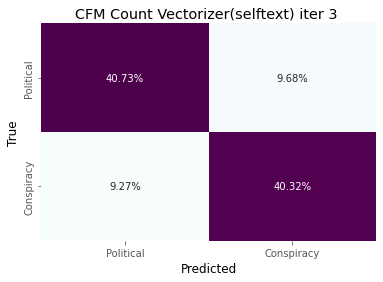

In [360]:
#
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [ 0.3, 0.4,0.5,0.6] # chose 1 the first time and then can maybe try higher magnitude values
}
gs3 = GridSearchCV(pipe, hyper_params,cv=3)
gs3.fit(X_train,y_train)
print('best score: ',gs3.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params: ',gs3.best_params_)
print('train score',gs3.score(X_train,y_train))
print('test score',gs3.score(X_test,y_test))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_test, gs3.predict(X_test))
cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext) iter 3 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');


The parameters following parameters have held constants for the past three iterations: 
<br><br>


Count Vector Parameters:
* binary       = True 
* n_gram range = (1,1)
* stop_words   = 'english'


Log Reg Parameters:
* N/A


***Noted: *grid search preferred a C=0.5 higher range this time around so will alter to increase upper range to [1.0, 0.1, 0.001, 0.0001]****


best overall accuracy score:  0.7750841750841752
best parameters:  {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'model__C': 0.1}
train score 0.960942760942761
test score 0.7943548387096774


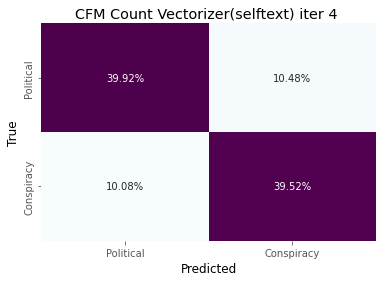

In [361]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('model', LogisticRegression(max_iter=10_000))    
])
# using default solver = lbfgs rest need to be altered b/c of convergence issues
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [1.0, 0.1, 0.001, 0.0001] # chose 1 the first time and then can maybe try higher magnitude values
}
gs4 = GridSearchCV(pipe, hyper_params,cv=3)
gs4.fit(X_train,y_train)
print('best overall accuracy score: ',gs4.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best parameters: ',gs4.best_params_)
print('train score',gs4.score(X_train,y_train))
print('test score',gs4.score(X_test,y_test))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_test, gs4.predict(X_test))
cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext) iter 4 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');


The parameters following parameters have held constants for the past four iterations: 
<br><br>


Count Vector Parameters:
* binary       = True 
* n_gram range = (1,1)


Log Reg Parameters:
* N/A


***Noted: <br>*grid search preferred a C = 0.1 so will alter range to [0.5,0.6,0.7] <br>
            grid search preferred stop_words = None (will not alter just yet)****


best score 0.7717171717171718
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.8, 'cvec__max_features': 2500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'model__C': 0.6}
train score 0.9838383838383838
test score 0.7923387096774194


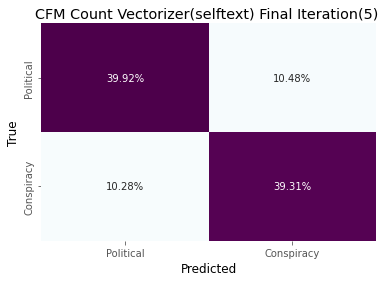

In [362]:
pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10_000))])
# running with liblinear
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.8,0.7,0.65],
    'cvec__max_features':[1500,2000,2500],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [0.5,0.6,0.7] 
}

gs5 = GridSearchCV(pipe1, hyper_params,cv=3)
gs5.fit(X_train,y_train)
print('best score',gs5.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs5.best_params_)
print('train score',gs5.score(X_train,y_train))
print('test score',gs5.score(X_test,y_test))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_test, gs5.predict(X_test))
cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext) Final Iteration(5) ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');


The parameters following parameters have held constants for the past five iterations: 
<br><br>


Count Vector Parameters:
* binary       = True 
* n_gram range = (1,1)



Count Vector (new hyper parameters explored): 

* lowercase    - determining if case sensitivity matters to model (True would mean the case sensitivity matters, False otherwise)
* max_df       - determining if setting a threshold on how many times a word occurs (if exceeded than removed from matrix) this was especially important to not necessarily focus on creating stop words just yet
* max_features - determines the  amount of most common words in the dataset so will find the X most common words in the data 


***Noted: <br>
Before iterating over these model we will combine selftext and title to get more potentially useful text to predict on in the following iterations since there seems to be a ceiling of about 79% to 81% accuracy scores in the past 5 iterations.***


--- 
The following Logistic Models will be fitted on the combined selftext and title texts, in order to gather some more context and allow for minimal redundancy if they were to vectorize seperately. 

In [ ]:
df_main.head()

,selftext,title,target
0,There are a lot of chauvinists in the U S who ...,Is Kamala Harris more at risk of assassination...,0
1,Let me explain The name of your movement shoul...,A push labeled Let mothers hold their babies,0
2,I have read about some horrific pit bull attac...,Why don t we see politicians supporting pit bu...,0
3,Some international observers have argued that ...,What threat does EU expansion pose towards Russia,0
4,Every definition of the term implies cheating ...,Why is gerrymandering legal,0


best score 0.8417508417508417
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.8, 'cvec__max_features': 2500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.5}
train score 0.9885521885521885
test score 0.8669354838709677


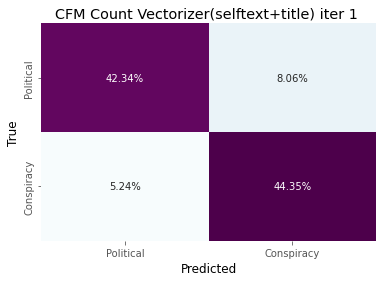

In [ ]:
X3 =  df_main['title'] + ' ' +df_main['selftext'] # eliminates redundancy
y1 = df_main['target']
X_vtrain_all, X_vtest_all, y_vtrain_all, y_vtest_all = train_test_split(X3,y1,random_state=42 ,stratify=y1 )

pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10_000))])
# running with liblinear
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.8,0.7,0.65],
    'cvec__max_features':[1500,2000,2500],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [0.5,0.6,0.7]  # will be altered in following iteration
}

gs_self_title_1 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_self_title_1.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_self_title_1.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_self_title_1.best_params_)
print('train score',gs_self_title_1.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_self_title_1.score(X_vtest_all,y_vtest_all))


# ploting confusion matrix
cf_matrix = confusion_matrix(y_vtest_all, gs_self_title_1.predict(X_vtest_all))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext+title) iter 1 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');


The parameters following parameters have held constants for the past six iterations: 
<br><br>

Count Vector Parameters:
* binary       = True 
* n_gram range = (1,1)

***Noted: <br>
The hyper parameters were maintained from the latest logistic regression iteration however we can tell that clearly combining both the selftext and title improved the model from our best score of 81% to 86.6% accuracy. These are both significatnly above the baseline of 50% accuracy. Our missclassifications have decreased however we can not that they are slightly unbalanced favoring Conspirancy predictions.***

best score 0.8451178451178452
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4}
train score 0.9858585858585859
test score 0.8729838709677419


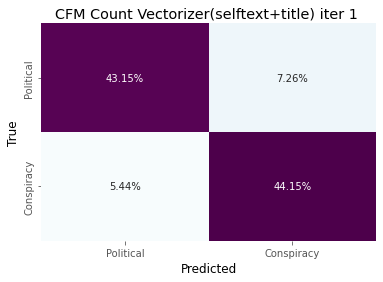

In [ ]:
X3 =  df_main['title'] + ' ' +df_main['selftext'] # eliminates redundancy
y1 = df_main['target']
X_vtrain_all, X_vtest_all, y_vtrain_all, y_vtest_all = train_test_split(X3,y1,random_state=42 ,stratify=y1 )

pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10_000))])
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.9,0.8,0.85,],
    'cvec__max_features':[2000,2500,3000],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1),(1,2),(1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.3,0.4,0.5,0.6] # new range
}

gs_self_title_2 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_self_title_2.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_self_title_2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_self_title_2.best_params_)
print('train score',gs_self_title_2.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_self_title_2.score(X_vtest_all,y_vtest_all))
# ploting confusion matrix
cf_matrix = confusion_matrix(y_vtest_all, gs_self_title_2.predict(X_vtest_all))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
cmd_obj
plt.title('CFM Count Vectorizer(selftext+title) iter 1 ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');


Noted: <br>
The only hyperparameters was C and was done so only slightly from [0.5,0.6,0.7] to [0.3,0.4,0.5,0.6]. 

***We have increased our accuracy scores from 86% to 87% from just that slight alteration. Our missclassifications have actually slightly decreased form the previous iteration becoming slighlty more balanced than before.***

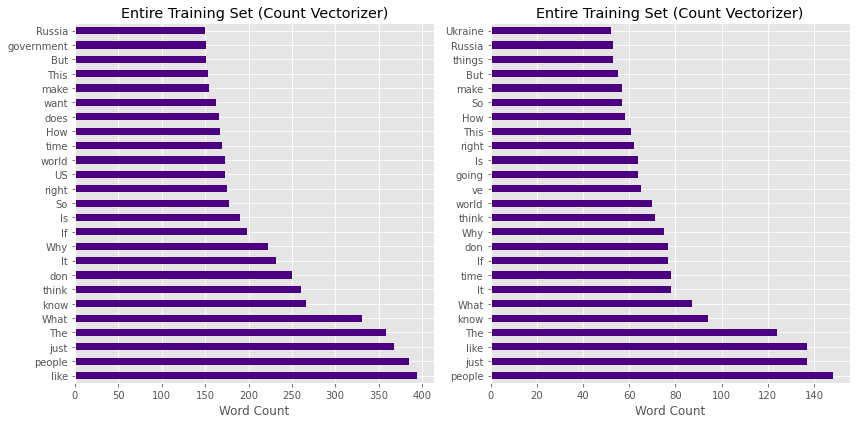

In [ ]:
# instantiate a vectorizer with parameters from grid search above
cvec3 = CountVectorizer(stop_words='english', binary=True,lowercase =False,
                        max_df= 0.9, max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec3_train = cvec3.fit_transform(X_vtrain_all)
Xcvec3_test = cvec3.transform(X_vtest_all)

# Convert X_train into a DataFrame.
Xcv3_df_train = pd.DataFrame(Xcvec3_train.todense(),columns=cvec3.get_feature_names())
Xcv3_df_test = pd.DataFrame(Xcvec3_test.todense(),columns=cvec3.get_feature_names())

########## Looking at top words in train vs test (Count Vectorizer)
fig= plt.style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize=(12,6))

Xcv3_df_train.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[0],color='indigo');
axes[0].set_title('Entire Training Set (Count Vectorizer)')
axes[0].set_xlabel('Word Count')
Xcv3_df_test.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[1],color='indigo');
axes[1].set_title('Entire Training Set (Count Vectorizer)')
axes[1].set_xlabel('Word Count');
fig = fig.tight_layout(); 

In [ ]:
series=Xcv3_df.sum().sort_values(ascending = False).head(25)
top25=list(series.index)
print(top25)

['going', 've', 'They', 'years', 'way', 'And', 'really', 'war', 'Ukraine', 'say', 'good', 'did', 'actually', 'Biden', 'things', 'country', 'political', 'In', 'new', 'believe', 'amp', 'state', 'said', 'lot', 'thing']


In [ ]:
# create a custom stop words based on these above 
stop_words = text.ENGLISH_STOP_WORDS.union(top25)

--- 
The following iteration is an attempt to create individually stop words however this was quickly avoided because of the optimization of the max_df is on a higher end of the range so this is a bit redundant. 

best score 0.8451178451178452
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.75, 'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4}
train score 0.9858585858585859
test score 0.8729838709677419


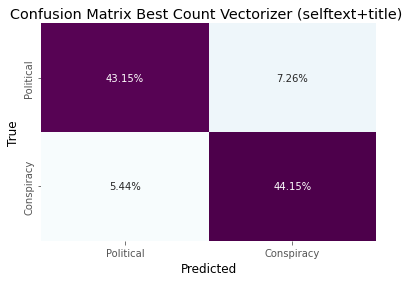

In [ ]:
# running with same inital pipe for Logistic Reg model (pipe1_)
hyper_params = {
    'cvec__stop_words': [stop_words, 'english'],  # introducing custom stop words
    'cvec__max_df':[0.75,0.8], # 0.8 for prev iterations
    'cvec__max_features':[2500,2750,3000], # best features were b/w 2500-3000 
    'cvec__lowercase':[False], # best params were False for previous 2 iterations
    'cvec__ngram_range':[(1,1),(1,2)], # best params were (1,1) for previous times
    'cvec__binary': [True], # best params were True for previous 2 iterations
    'model__C' : [0.4,0.45,0.5] # best params were 0.4-0.5 both previous times
}

gs_self_title_3 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_self_title_3.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_self_title_3.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_self_title_3.best_params_)
print('train score',gs_self_title_3.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_self_title_3.score(X_vtest_all,y_vtest_all))
# the previous two iterations resulted with the same results so will plot gs_all2 predictions
cf_matrix = confusion_matrix(y_vtest_all, gs_self_title_3.predict(X_vtest_all))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
## also controls the title.
cmd_obj
plt.title('Confusion Matrix Best Count Vectorizer (selftext+title) ',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

Hyper Parameters altered: 
* stop_words    from [None, 'english']   to [stop_words, 'english']
* max_df'       from [0.9,0.8,0.85,]     to [0.75,0.8]
* max_features  from [2000,2500,3000]    to [2500,2750,3000]
* lowercase     from [True,False]        to [False]
* ngram_range   from [(1,1),(1,2),(1,3)] to [(1,1),(1,2)]
* binary altered from [False, True]      to [True]
    
* C altered from [0.3,0.4,0.5,0.6]          to [0.4,0.45,0.5]

 <br>Noted: <br>


***The accuracy score remained the same for the previous two iterations at 87%. Our missclassifications has been consistent as well so will be concluding this is about as far  as the model can go given these features and transformer.***

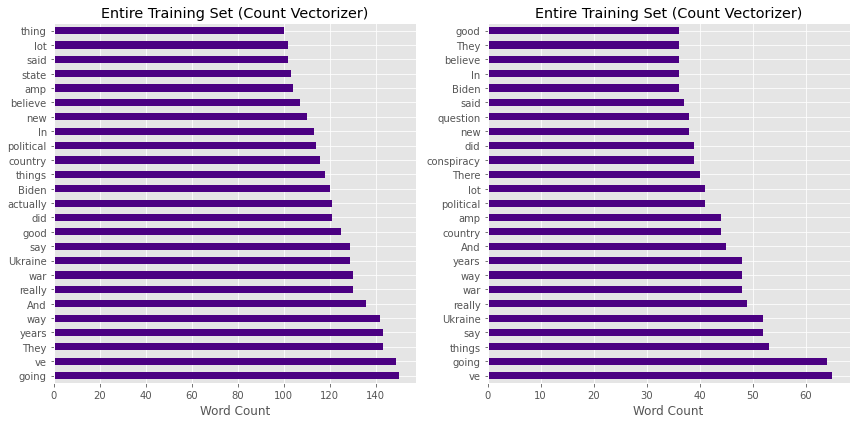

In [ ]:
# looking at top words in best params for from gridsearch above

# instantiate a vectorizer with parameters from grid search above
cvec = CountVectorizer(stop_words=stop_words, binary=True,lowercase =False,
                        max_df= 0.75, max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec_train = cvec.fit_transform(X_vtrain_all)
Xcvec_test = cvec.transform(X_vtest_all)

# Convert X_train into a DataFrame.
Xcv3_train = pd.DataFrame(Xcvec_train.todense(),columns=cvec.get_feature_names())
Xcv3_test = pd.DataFrame(Xcvec_test.todense(),columns=cvec.get_feature_names())

########## Looking at top words in train vs test (Count Vectorizer)
fig= plt.style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize=(12,6))

Xcv3_train.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[0],color='indigo');
axes[0].set_title('Entire Training Set (Count Vectorizer)')
axes[0].set_xlabel('Word Count')
Xcv3_test.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[1],color='indigo');
axes[1].set_title('Entire Training Set (Count Vectorizer)')
axes[1].set_xlabel('Word Count');
fig = fig.tight_layout(); 

From these two barcharts we can observe that the count vecotizer captured a lot of filler words despite having a max_df on the higher end. In an attempt to reduce this we will conduct a quick analysis using the TF-IDF vectorizer  below.

---
### Altering transformer (from Count Vectorizer to TF-IDF)
The change in transformer is since the TF-IDF Vectorizer does not just focus on the frequency of words in the entire corpus but rather the inverse of the frequecy it considers the importance rather than just count. Typically creating a better overall model.


best score 0.8686868686868688
best params {'model__C': 0.5, 'tr__binary': True, 'tr__lowercase': False, 'tr__max_df': 0.75, 'tr__max_features': 3000, 'tr__ngram_range': (1, 2), 'tr__stop_words': 'english'}
train score 0.9474747474747475
test score 0.8810483870967742


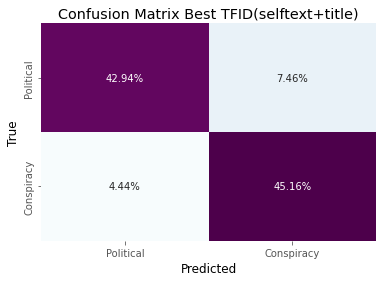

In [364]:
### edit this to work with  our training data! ############################################################
X3 =  df_main['title'] + ' ' +df_main['selftext'] # eliminates redundancy

y1 = df_main['target']
X_vtrain_all, X_vtest_all, y_vtrain_all, y_vtest_all = train_test_split(X3,y1,
                                                                        random_state=42 ,stratify=y1 )

pipe_vect2 = Pipeline([
    ('tr',TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=10_000))    # dont need to use LogRegCV() since using gridsearch
])
pipe_vect2.fit(X_train,y_train)
pipe_vect2.score(X_train,y_train),pipe_vect2.score(X_test,y_test)

# running with same inital pipe for Logistic Reg model (pipe1_)
hyper_params = {
    'tr__stop_words': [None,stop_words, 'english'],  # introducing custom stop words
    'tr__max_df':[0.75,0.8], # 0.8 for prev iterations
    'tr__max_features':[2500,2750,3000], # best features were b/w 2500-3000 
    'tr__lowercase':[True,False], # best params were False for previous 2 iterations
    'tr__ngram_range':[(1,1),(1,2)], # best params were (1,1) for previous times
    'tr__binary': [True,False], # best params were True for previous 2 iterations
    'model__C' : [0.4,0.45,0.5] # best params were 0.4-0.5 both previous times
}

gs_pipe_vect2 = GridSearchCV(pipe_vect2, hyper_params,cv=3)
gs_pipe_vect2.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_pipe_vect2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_pipe_vect2.best_params_)
print('train score',gs_pipe_vect2.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_pipe_vect2.score(X_vtest_all,y_vtest_all))
# checking results of confusion matrix with tfid vectorizer
cf_matrix = confusion_matrix(y_vtest_all, gs_pipe_vect2.predict(X_vtest_all))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
## also controls the title.
cmd_obj
plt.title('Confusion Matrix Best TFID(selftext+title)',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

Hyper Parameters altered: 

* stop_words    from [stop_words, 'english'] to  [None,stop_words, 'english']
* max_df'      (held constant)
* max_features  (held constant)
* lowercase     from [False] to [True,False]
* ngram_range   (held constant)
* binary altered from [True] to [True,False]
    
* C altered (held constant)
 <br>Noted: <br>

***The accuracy score increased by 1% from the previous score of 87% and we reduced the overfitting slightly from the difference in train to test score being about 11% to 6% in this latest iteration. The amount of misclassifications overall reduced slightly with less false predictions of political posts being categorized as a conspiracy post. However the model still slightly is unbalanced favoring predictions of conspiracy.***

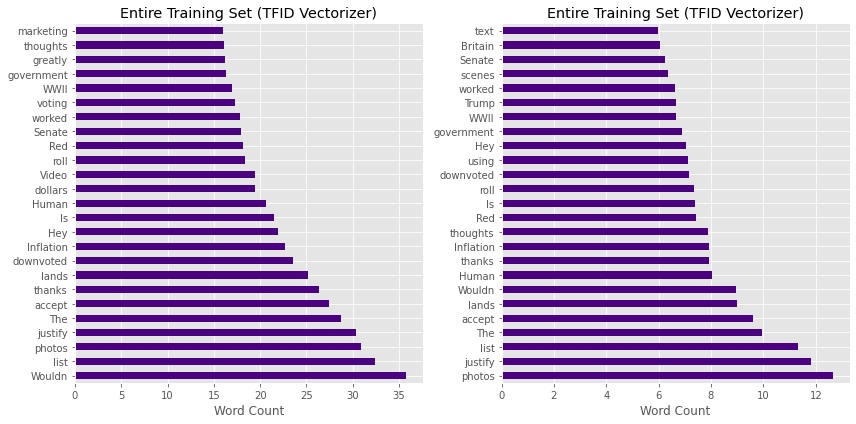

In [365]:
# using the best params for the tfid vectorizer to look at top words
first_tfid_vect = TfidfVectorizer(binary=True,max_df=0.75,stop_words='english',max_features=3000,
                                  lowercase=False, ngram_range=(1,2))

# fit and transform on self text using tfid
Xtfid_train = first_tfid_vect.fit_transform(X_vtrain_all)
Xtfid_test = first_tfid_vect.transform(X_vtest_all)

# Convert X_train and X_test into a DataFrame.
Xtfid_train = pd.DataFrame(Xtfid_train.todense(),columns=cvec.get_feature_names())
Xtfid_test = pd.DataFrame(Xtfid_test.todense(),columns=cvec.get_feature_names())

########## Looking at top words in train vs test (tfid vectorizer)
fig= plt.style.use('ggplot')
fig, axes = plt.subplots(1,2,figsize=(12,6))

Xtfid_train.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[0],color='indigo');
axes[0].set_title('Entire Training Set (TFID Vectorizer)')
axes[0].set_xlabel('Word Count')
Xtfid_test.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',ax=axes[1],color='indigo');
axes[1].set_title('Entire Training Set (TFID Vectorizer)')
axes[1].set_xlabel('Word Count');
fig = fig.tight_layout(); 


This is just a quick glimpse at the top words between the test and train dataset given the TFID vectorizer. These are clearly different words than what the count vectorizer was able to filter out they appear to hold more predicitve power than the words in the other train/test top 25 words above. So for future work this is a transformer to consider and optimize to even gather a a more consistent model.

### Important Note this was the best Logisitc Regression model (gs_pipe_vect2) so this model will be utilized at end of note book to inspect most impactful words in dataset

---
# Feature Creations:
- counting number of uppercase & lowercase characters in each selftext post
- counting amount of punctuation characters in each selftext post 

Note: 
 The vectorization was decided based on best Count Vectorizer parameters from final logistic grid search (gs_self_title_3), although because this process took longer than expected a second split of the data with the TF-IDF should be expected to perform better. This could be a future step after completion of the project.

In [363]:
# making copies to manipulate 
X3_all = df_main[['selftext','title']].copy()

# renaming y because 'target' is found within the actual selftext and title 
y1 = df_main['target'].copy()

# renaming y because 'target' is found within the actual selftext and title 
y1.rename('class',axis='columns',inplace=True)


X3_vtrain_all, X3_vtest_all, y3_train, y3_test = train_test_split(X3_all,y1,random_state=42 ,stratify=y1 )


# combining title and selftext to feed into the vectorizer as one
X3_train =  X3_vtrain_all['title'] + ' ' +X3_vtrain_all['selftext'] # eliminates redundancy
X3_test =  X3_vtest_all['title'] + ' ' +X3_vtest_all['selftext'] # eliminates redundancy


# instantiate a vectorizer with parameters from grid search above
cvec = CountVectorizer(stop_words='english', # eliminating the basic stop words
                       binary=True,
                       lowercase =False, # we want to pay attention to case sensitivity later
                        max_df= 0.75, # this is a form of creating a customized stop words list 
                        max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec_train = cvec.fit_transform(X3_train)
Xcvec_test = cvec.transform(X3_test)

# Convert X_train and X_test into a DataFrame.
Xcv3_train = pd.DataFrame(Xcvec_train.todense(),columns=cvec.get_feature_names())
Xcv3_test = pd.DataFrame(Xcvec_test.todense(),columns=cvec.get_feature_names())

# creating copies to manipulate
X3_vtrain_all=X3_vtrain_all.copy()
X3_vtest_all=X3_vtest_all.copy()

# punctuation
X3_vtrain_all['punc_cnt'] = X3_vtrain_all['selftext'].apply(punctuation_cntr)
X3_vtest_all['punc_cnt'] = X3_vtest_all['selftext'].apply(punctuation_cntr)

# Lower case count
X3_vtrain_all['Lcase_counter'] = X3_vtrain_all['selftext'].apply(Lcase_counter)
X3_vtest_all['Lcase_counter'] = X3_vtest_all['selftext'].apply(Lcase_counter)

# Upper case count 
X3_vtrain_all['Ucase_counter'] = X3_vtrain_all['selftext'].apply(Ucase_counter)
X3_vtest_all['Ucase_counter'] = X3_vtest_all['selftext'].apply(Ucase_counter)

# dropping non numerical columns for Logistic Regression model prep 
X3_vtrain_all.drop(columns=['selftext','title'],inplace=True)
X3_vtest_all.drop(columns=['selftext','title'],inplace=True)

# resetting index for joining below
X3_vtrain_all.reset_index(inplace=True)
X3_vtest_all.reset_index(inplace=True)

# append these to appropriate train/test dataframes to pass into logistic classifer grid search
train_whole = pd.concat([Xcv3_train,X3_vtrain_all], axis=1, join='outer')
test_whole = pd.concat([Xcv3_test,X3_vtest_all], axis=1, join='outer')
print('train whole shape: ',train_whole.shape,y3_train.shape)

# after some EDA below realized index was carried through during the concatenation so removied below
train_whole = train_whole.drop(columns=['index'])
test_whole = test_whole.drop(columns=['index'])

# exporting for future models 
train_whole.to_csv('../data/train_test_whole_dfs/train_whole.csv',index=False)
y3_train.to_csv('../data/train_test_whole_dfs/y_train.csv',index=False)
test_whole.to_csv('../data/train_test_whole_dfs/test_whole.csv',index=False)
y3_test.to_csv('../data/train_test_whole_dfs/y_test.csv',index=False)

print('test whole shape: ',test_whole.shape, y3_test.shape)
test_whole[['punc_cnt','Lcase_counter','Ucase_counter']].head(2)


train whole shape:  (1485, 3004) (1485,)
test whole shape:  (496, 3003) (496,)


,punc_cnt,Lcase_counter,Ucase_counter
0,16,66,6
1,124,503,15


best score 0.8511784511784511
best params {'model__C': 0.5, 'model__solver': 'newton-cg'}
train score 0.9892255892255892
test score 0.8467741935483871


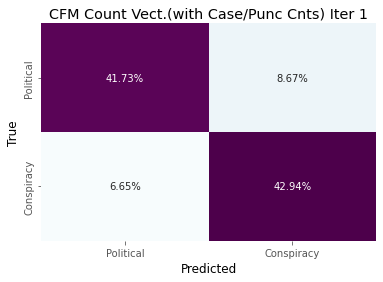

In [ ]:
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe) but comparing solvers for Log Reg 
hyper_params = {
    'model__solver':['newton-cg', 'lbfgs', 'liblinear'],
    'model__C' : [0.4,0.5,1] # best params were 0.4-0.5 both previous times
}

gs_whole = GridSearchCV(pipe, hyper_params,cv=3)
gs_whole.fit(train_whole,y3_train)

print('best score',gs_whole.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole.best_params_)
print('train score',gs_whole.score(train_whole,y3_train))
print('test score',gs_whole.score(test_whole,y3_test))

# checking results of confusion matrix with tfid vectorizer
cf_matrix = confusion_matrix(y3_test, gs_whole.predict(test_whole))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
## also controls the title.
cmd_obj
plt.title('CFM Count Vect.(with Case/Punc Cnts) Iter 1',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

Hyper Parameter Alterations: <br>
* C from [0.4,0.45,0.5] to  [0.4,0.5,1] - given a broader range to determine what would be ideal
* solver from default ['lbfgs'] to ['newton-cg', 'lbfgs', 'liblinear']



    
***We have decreased our accuracy scores from 87% to 84.7% from introducing the three features! Our missclassifications have actually clearly increased form the previous iteration and the imbalance is generally consistent.***

best score 0.8161616161616161
best params {'model__penalty': 'none', 'model__solver': 'newton-cg'}
train score 1.0
test score 0.8205645161290323


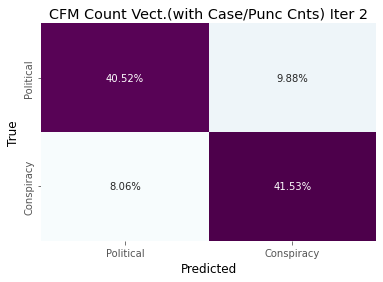

In [ ]:
# check best solver and penalties that are appropriate for it
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe)
hyper_params = {
    'model__penalty':['none'], # 
    'model__solver':['newton-cg'] # 
}

gs_whole2 = GridSearchCV(pipe, hyper_params,cv=3)
gs_whole2.fit(train_whole,y3_train)

print('best score',gs_whole2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole2.best_params_)
print('train score',gs_whole2.score(train_whole,y3_train))
print('test score',gs_whole2.score(test_whole,y3_test))


# checking results of confusion matrix with tfid vectorizer
cf_matrix = confusion_matrix(y3_test, gs_whole2.predict(test_whole))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
## also controls the title.
cmd_obj
plt.title('CFM Count Vect.(with Case/Punc Cnts) Iter 2',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

Hyper Parameter Alterations: <br>
* C from [0.4,0.5,1] to [None] an attempt to evaluate performance differences with one penalty term for newton-cg 
* solver from default ['lbfgs'] to ['newton-cg']



    
***We have decreased our accuracy scores from 84.7% to 82% from limiting the penalty to None so will check other appropriate penalty! Our missclassifications have actually increased form the previous iteration and the imbalance is generally consistent.***

best score 0.8511784511784511
best params {'model__C': 0.3, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
train score 0.9831649831649831
test score 0.8568548387096774


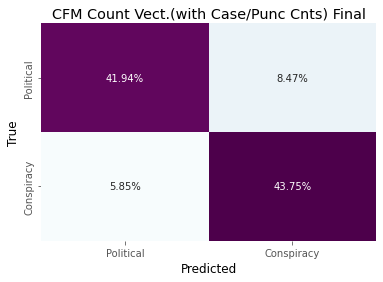

In [ ]:
# check best solver and penalty (l2,none) that are appropriate for it (dropping alpha for none penaly since unnecessary)
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe)
hyper_params = {
    'model__penalty':['l2'], # 
    'model__solver':['newton-cg'], # 
    'model__C' : [0.3,0.4,0.45,0.5] # best params were 0.4-0.5 both previous times
}

gs_whole3 = GridSearchCV(pipe, hyper_params,cv=3)


gs_whole3.fit(train_whole,y3_train)

print('best score',gs_whole3.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole3.best_params_)
print('train score',gs_whole3.score(train_whole,y3_train))
print('test score',gs_whole3.score(test_whole,y3_test))
# checking results of confusion matrix with tfid vectorizer
cf_matrix = confusion_matrix(y3_test, gs_whole3.predict(test_whole))

cmd_obj = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="BuPu", cbar=False,xticklabels=['Political','Conspiracy'],
            yticklabels=['Political','Conspiracy']);
## also controls the title.
cmd_obj
plt.title('CFM Count Vect.(with Case/Punc Cnts) Final',color='black');
plt.xlabel('Predicted',color='black');
plt.ylabel('True',color='black');

Hyper Parameter Alterations: <br>
* C from [None] to ['l2'] an attempt to evaluate performance differences with one penalty term for newton-cg 
* solver remained constant (newton-cg)


***We have increased our accuracy scores slightly from 82% to 85.7% from altering the penalty to l2. Our missclassifications have actually slightly decreased form the previous iteration.***

In [383]:
# creating dataframe for analysis of coefficients below 
log_reg_coefs_tfidf=  gs_pipe_vect2.best_estimator_.named_steps['model'].coef_[0]
importance_tfidf = Xtfid_train.columns
tfidf_log_reg_importances_df = pd.DataFrame({'Coefficients': log_reg_coefs_tfidf, 'Word': importance_tfidf})
tfidf_log_reg_importances_df.sort_values(by='Coefficients',ascending=False)

,Coefficients,Word
970,1.381002,continue
438,1.274138,The
638,0.984824,army
2734,0.764910,testing
2166,0.718465,presidential
...,...,...
2151,-1.260045,ppl
513,-1.328240,Wouldn
192,-1.353339,Hey
2146,-1.711754,potentially


In [389]:
# creating dataframe for analysis of coefficients below (both top count vectorizer and tf-idf)
cnt_vect_log_reg_coefs =  gs_whole3.best_estimator_.named_steps['model'].coef_[0]
cnt_vect_importance = train_whole.columns
cnt_vect_log_reg_importances_df = pd.DataFrame({'Coefficients': cnt_vect_log_reg_coefs, 'Word': cnt_vect_importance})
cnt_vect_log_reg_importances_df.sort_values(by='Coefficients',ascending=False)

,Coefficients,Word
961,1.112583,conspiracy
663,0.598454,attention
93,0.598057,Conspiracy
1040,0.596491,cyber
657,0.589096,attack
...,...,...
1001,-0.729474,country
202,-0.920990,How
2126,-1.047388,politics
2122,-1.232979,political


In [390]:
# storing as filtered dfs
tfidf_positive_top_10 = tfidf_log_reg_importances_df.sort_values(by='Coefficients',ascending=False)[:10]
tfidf_negative_top_10 = tfidf_log_reg_importances_df.sort_values(by='Coefficients',ascending=True)[:10]

# storing as filtered dfs
cnt_vect_positive_top_10 = cnt_vect_log_reg_importances_df.sort_values(by='Coefficients',ascending=False)[:10]
cnt_vect_negative_top_10 = cnt_vect_log_reg_importances_df.sort_values(by='Coefficients',ascending=True)[:10]

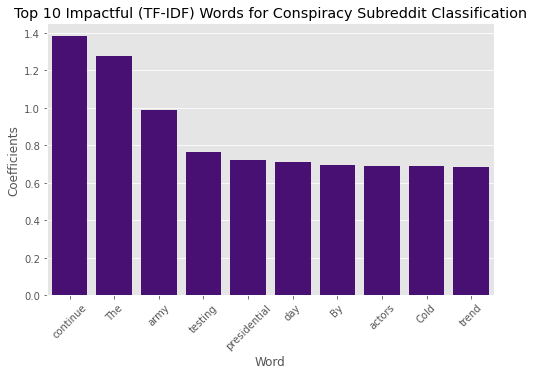

In [388]:
plt.style.use('ggplot')
plt.subplots(figsize=(8, 5))
sns.barplot('Word', 'Coefficients', data=tfidf_positive_top_10, color='indigo')
plt.xticks(rotation=45)
plt.title('Top 10 Impactful (TF-IDF) Words for Conspiracy Subreddit Classification');

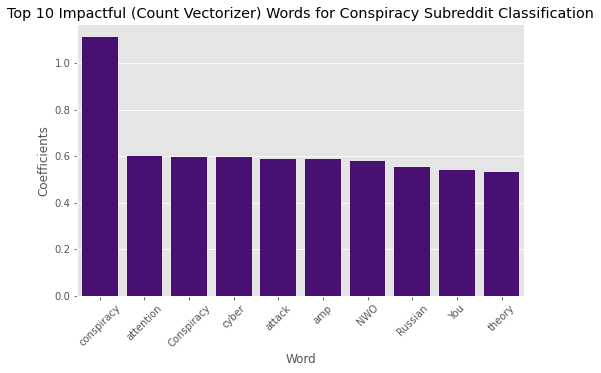

In [392]:
plt.style.use('ggplot')
plt.subplots(figsize=(8, 5))
sns.barplot('Word', 'Coefficients', data=cnt_vect_positive_top_10, color='indigo')
plt.xticks(rotation=45)
plt.title('Top 10 Impactful (Count Vectorizer) Words for Conspiracy Subreddit Classification');

In [378]:
# calculations of top two most negative and postively correlated words by exponetiatinge^coefficient
print('continue percentage: ',round(np.exp(1.381002),2),'%')
print('accept percentage: ',round(np.exp(2.176640),2),'%')

continue percentage:  3.98 %
accept percentage:  8.82 %


These coefficients are in log odds so in order to maintain the sign relationship they were not exponetiated. So this means when we are looking at in this case the top coefficients (in TF-IDF) and its corresponding word above, 'continue', we can interpret this as the presence of the word 'continue' in a text increases the odds of the text corresponding to the Conspiracy Subreddit discussions by 3.98%. A similar statement can be said for the word 'accept' for the subreddit AskPolitics below (in TF-IDF). 


The top 10 words in the TF-IDF transformer generally make sense however it appears that the Conspiracy subreddit does value less formal vocabulary whereas in the AskPolitics subreddit does contain more formal words such as 'violate' and 'potentially'. Whereas in the Count Vectorizer top Logistic Regression (last bar chart below this cell) we get more of an insight of the hot topics of the current time in these groups. 

For the polical discourse group we can see topics of interest are the events occuring in Afghanistan for instance or earlier in our test and train there was a mention of 'Ukraine' being among an important topic. A similar statement could be said for the Conspiracy discourse where Russia and cyber (potentially cyber attacks) are hot topics to avoid appearing as not credible to this general population when creating social media political messaging. 

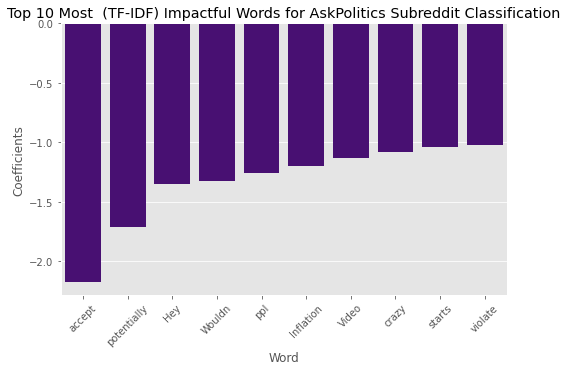

In [379]:
plt.style.use('ggplot')
plt.subplots(figsize=(8, 5))
sns.barplot('Word', 'Coefficients', data=tfidf_negative_top_10, color='indigo')
plt.xticks(rotation=45)
plt.title('Top 10 Most  (TF-IDF) Impactful Words for AskPolitics Subreddit Classification');

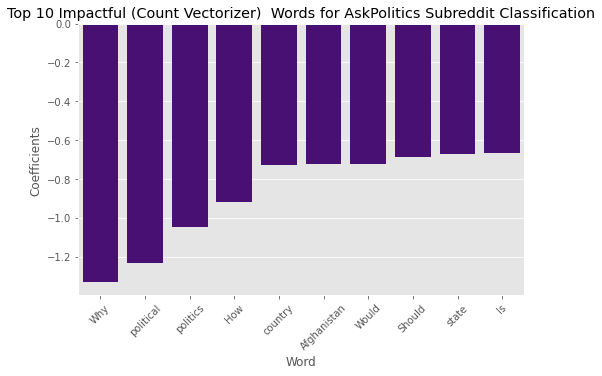

In [394]:

plt.style.use('ggplot')
plt.subplots(figsize=(8, 5))
sns.barplot('Word', 'Coefficients', data=cnt_vect_negative_top_10, color='indigo')
plt.xticks(rotation=45)
plt.title('Top 10 Impactful (Count Vectorizer)  Words for AskPolitics Subreddit Classification');

---
Logistic Regression Final Conclusions

Ultimately we are able to get a sense of what type of words to avoid there are various ways to build up this models capabilities that can be explored further but the conclusion can be made that there is a difference between political and conspiracy discourse. A more indepth sentiment analysis will likely be helpful for future politically centered clients however for the preliminary exploration and purpose of this project, differentiating text between conspiracy and political discouse can be made from our final model. 

Additional notes can be made from the model created we can see that there are some topics to be avoided such to have a more strengthening message to the general public. There are topics to address shownn in our examination of top 25 words thoughout our model iterations, where in our polical discourse hot topics were those that contained 'Ukraine'. Another conclusion can be made for the events occuring in Afghanistan where these are frequent topics of discussion that appeared in our final examination process.

---
Future Recommendations 

More work could be done to improve this model however with the rise in fake news a very essential objective of any modern day political candidate would need to consider how they will not only improve their communications to improve their connections with the general public they hope to represent, but additional resources should be allocated to explore how we as a marketing strategy group could address this rising issue. So my recommendation is to look at the larger social media platforms and attempt to create a predicitve model that campaign communications managers could utilize to guage what audience their messaging appeals to or follows. 